In [11]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 14

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
sns.set(style="ticks")

In [12]:
# Description:
# dataset consists of 50 samples for each of three species of iris(i.e setosa,versicolor,virginica)
# four features were measured from each sample i.e length and width of the sepals and petals

In [13]:
# loading the data using seaborn and name as iris

iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [25]:
def samples(data):
    n = len(data)
    h=data.head()
    t=data.tail()
    var = int((n/2)-2)
    var1 =int((n/2)+2)
    m=data.iloc[var:var1]
    return h,t,m

(   sepal_length  sepal_width  petal_length  petal_width species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa,
      sepal_length  sepal_width  petal_length  petal_width    species
 145           6.7          3.0           5.2          2.3  virginica
 146           6.3          2.5           5.0          1.9  virginica
 147           6.5          3.0           5.2          2.0  virginica
 148           6.2          3.4           5.4          2.3  virginica
 149           5.9          3.0           5.1          1.8  virginica,
     sepal_length  sepal_width  petal_length  petal_width     species
 73           6.1          2.8           4.7          1.2  versicolor
 74           6.4          2.9           4.3    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ff82b47b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5ff49e2128>]], dtype=object)

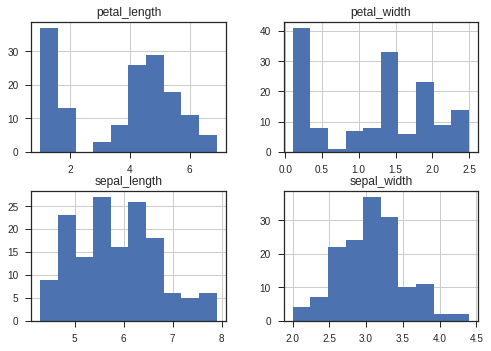

In [3]:
iris.hist()

In [4]:
iris.skew()

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

In [3]:
iris.shape

# dataset consists of 150 rows and 5 columns

(150, 5)

In [4]:
iris.info()

# checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
# Spliting the dataset into training and test sets by using randomsplit

import sklearn.model_selection as ms
rn_train_set, rn_test_set = ms.train_test_split(iris, test_size = 0.2, random_state=42)  
rn_train_set.shape
rn_test_set.shape

(120, 5)

(30, 5)

In [142]:
# Split the training data set into features and labels

X_train = rn_train_set.drop('species', axis=1)
y_train = rn_train_set.species.copy()
y_train = np.asarray(y_train)
X_train = np.asarray(X_train)

In [143]:
# Split the test data set into features and labels

X_test= rn_test_set.drop('species', axis=1)
y_test = rn_test_set.species.copy()
y_test = np.asarray(y_test)
X_test = np.asarray(X_test)

In [185]:
# set True if the label is versicolor otherwise set False for both train and test sets of the labels

y_train1 = y_train[115]
y_train_1 = (y_train == y_train1 )
y_test1 = y_test[15]
y_test_1 = (y_test == y_test1 )
y_train1,y_test1

('versicolor', 'versicolor')

# Binary classifier

In [145]:
# creating a simple binary classifier which clasifies whether it is true or false

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
x = sgd_clf.fit(X_train, y_train_1)
x

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [195]:
a=sgd_clf.predict(X_train)

In [212]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_ps = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3) 
confusion_matrix(y_train_1, y_ps)

array([[38, 41],
       [14, 27]])

In [196]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [170]:
y_ps1 = cross_val_predict(forest_clf, X_train, y_train_1, cv=3) 
confusion_matrix(y_train_1, y_ps1)

array([[78,  1],
       [ 3, 38]])

In [197]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [210]:
y_ps2 = cross_val_predict(GNB, X_train, y_train_1, cv=3) 
confusion_matrix(y_train_1, y_ps2)

array([[73,  6],
       [ 6, 35]])

In [199]:
# sgd,randomforest and Gaussian Navie Bayes classifiers  are used for training

# performance measurement 

In [151]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
def measure(clf,a,b):
    y_ps = cross_val_predict(clf, a, b, cv=3)
    p_s=precision_score(b, y_ps)
    r_s=recall_score(b, y_ps)
    f_s=f1_score(b, y_ps)
    return p_s,r_s,f_s

In [152]:
measure(forest_clf, X_train, y_train_1) # randomforest classifier

(0.97435897435897434, 0.92682926829268297, 0.95000000000000007)

In [153]:
measure(sgd_clf,X_train, y_train_1) # sgd classifier

(0.39705882352941174, 0.65853658536585369, 0.49541284403669722)

In [186]:
measure(GNB,X_train, y_train_1) # Gaussian Navie Bayes classifier

(0.85365853658536583, 0.85365853658536583, 0.85365853658536583)

In [174]:
# precision,recall and f1_score are good for randomforest classifier than sgd classifier and Gaussian Navie Bayes classifiers

# Unsupervised method

In [155]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_2D=pca.transform(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [156]:
p=pd.DataFrame(X_2D,columns=['col0','col1'])
p.head()

col0      col1
0 -3.171916  0.129457
1 -2.347458  1.337815
2  0.971521  0.486044
3 -2.567534  0.016052
4 -2.950888 -0.343588

In [157]:
df1 = pd.DataFrame(y_train, columns=['species'])
df2=pd.concat([p, df1], axis=1)
df2.head()

col0      col1     species
0 -3.171916  0.129457      setosa
1 -2.347458  1.337815      setosa
2  0.971521  0.486044  versicolor
3 -2.567534  0.016052      setosa
4 -2.950888 -0.343588      setosa

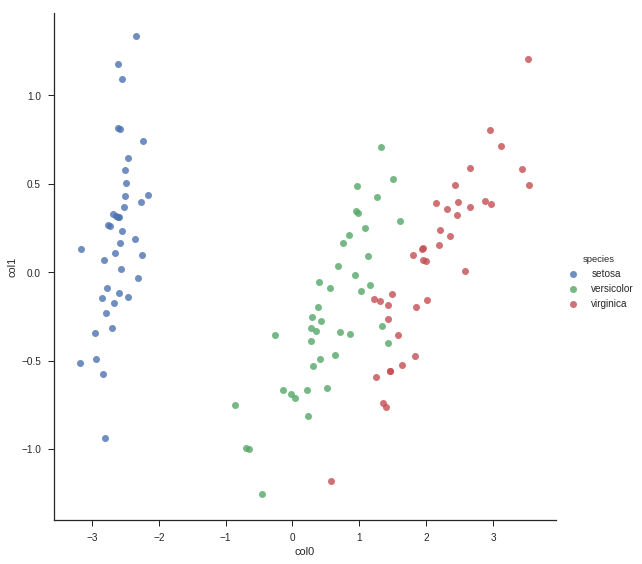

In [158]:
b= sns.lmplot(x='col0', y='col1', hue="species", data=df2,fit_reg=False,size=8)

In [159]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_2D)
k=kmeans.labels_

In [160]:
df3 = pd.DataFrame(k, columns=['species'])
df4 = pd.concat([p, df3], axis=1)

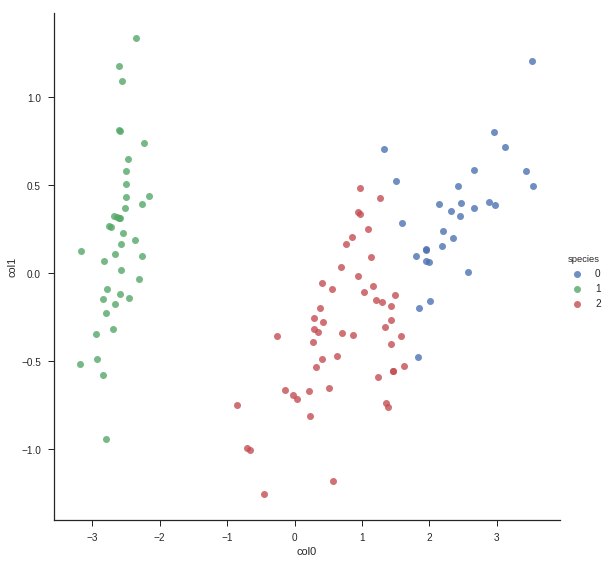

In [161]:
b= sns.lmplot(x='col0', y='col1', hue="species", data=df4,fit_reg=False,size=8)

# Seabornplots

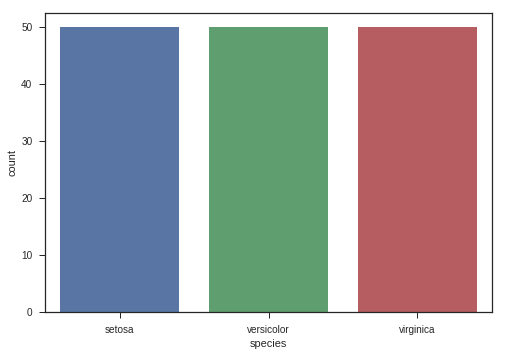

In [204]:
 x= sns.countplot(x="species",data=iris)

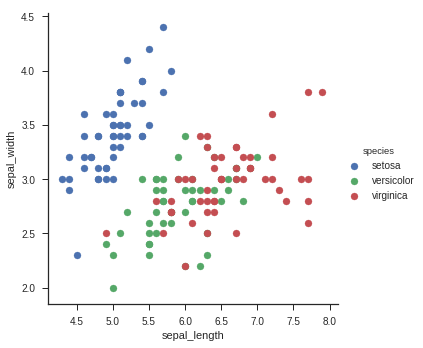

In [179]:
a=sns.FacetGrid(iris,hue='species',size=5,aspect=1)
a=a.map(plt.scatter,'sepal_length','sepal_width')
a=a.add_legend()

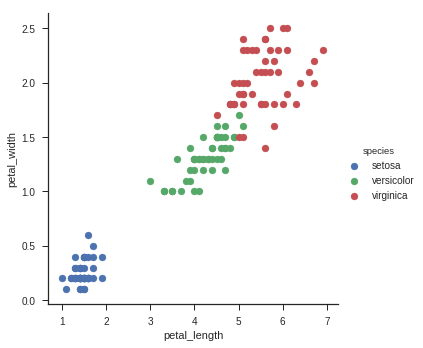

In [180]:
a=sns.FacetGrid(iris,hue='species',size=5,aspect=1)
a=a.map(plt.scatter,'petal_length','petal_width')
a=a.add_legend()

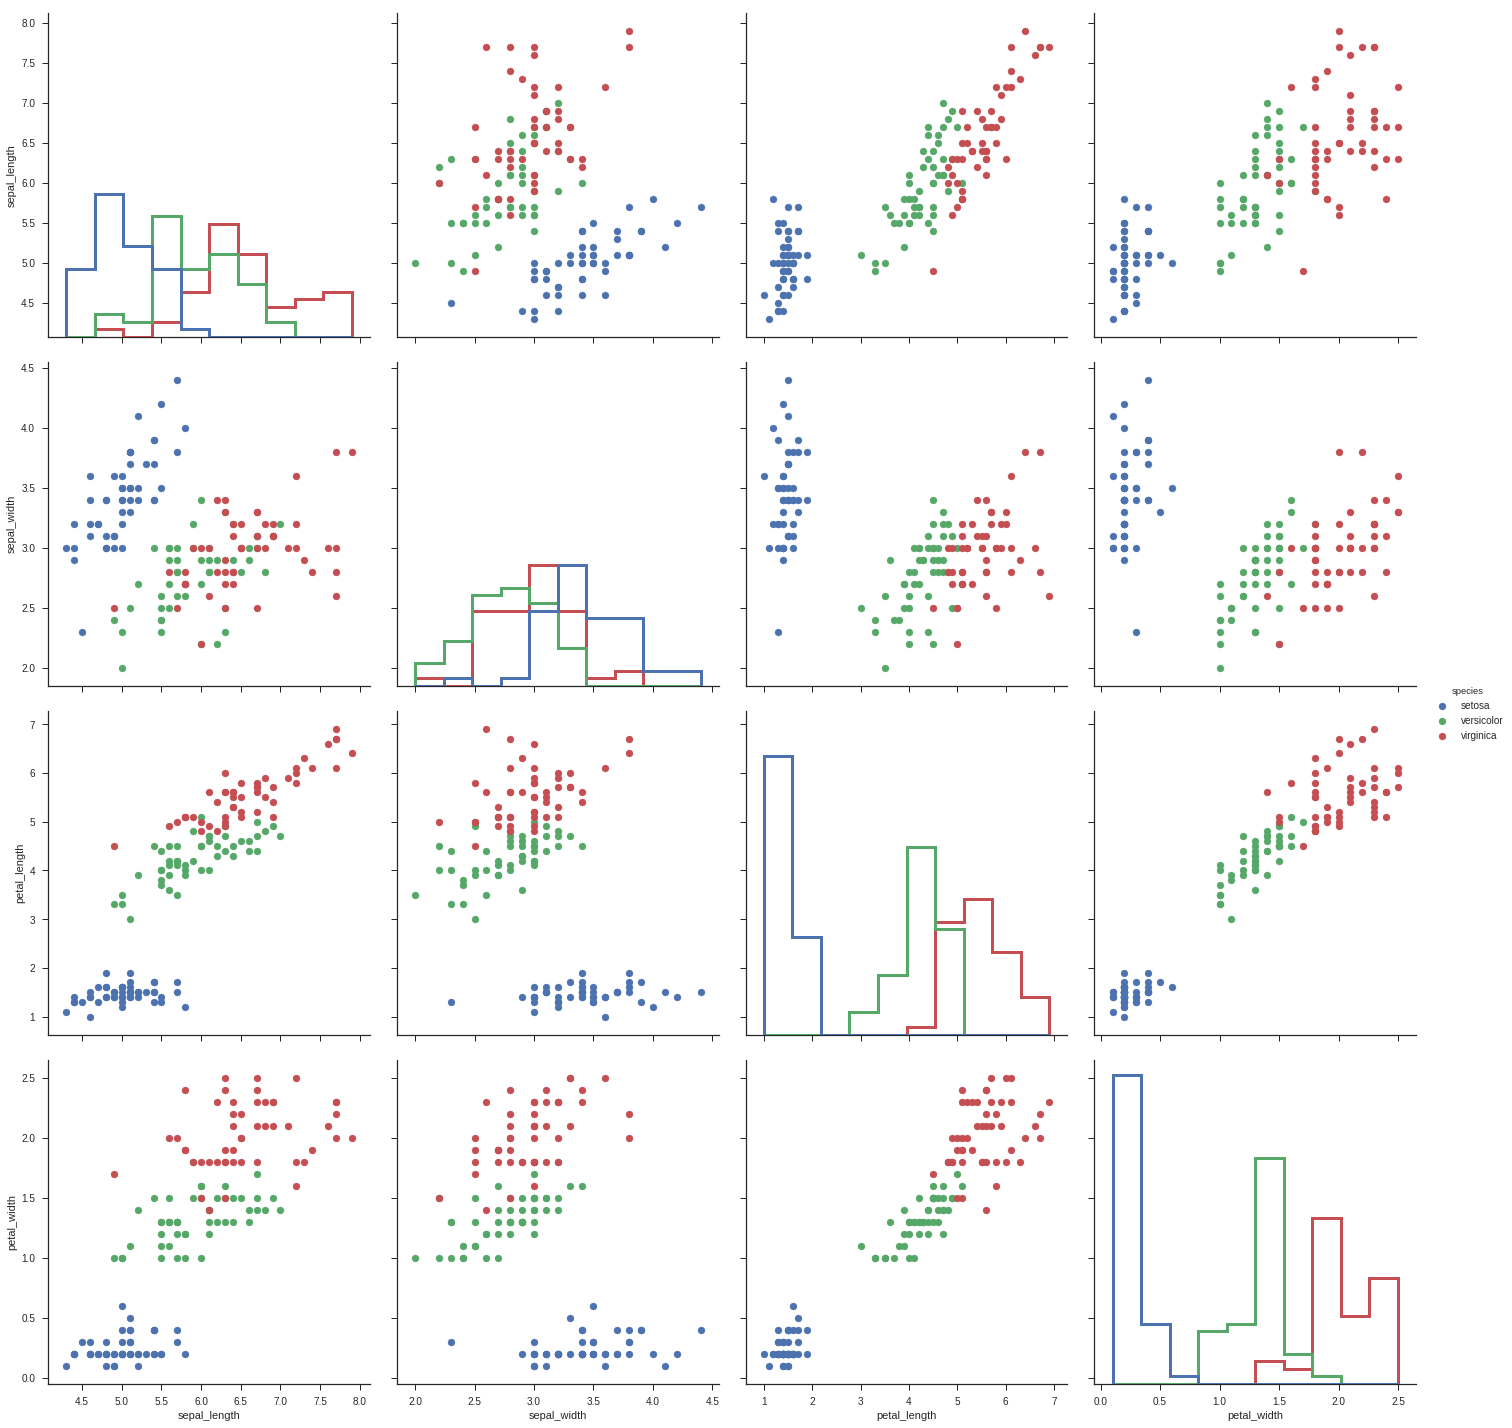

In [181]:
b = sns.PairGrid(iris,hue='species',size=5,aspect=1)
b = b.map_diag(plt.hist,histtype='step',linewidth=3)
b = b.map_offdiag(plt.scatter)
b = b.add_legend()

In [227]:
# from the above plot Iris-setosa is separated from other values

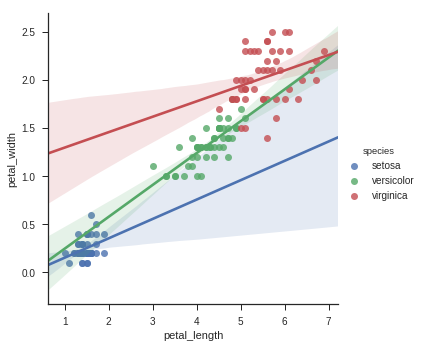

In [182]:
b= sns.lmplot(x='petal_length', y='petal_width', hue="species", data=iris,size=5,aspect=1)

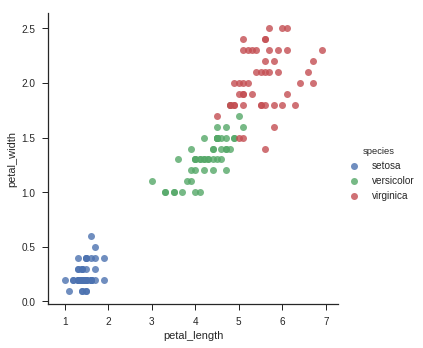

In [183]:
b= sns.lmplot(x='petal_length', y='petal_width', hue="species", data=iris,fit_reg=False,size=5,aspect=1)

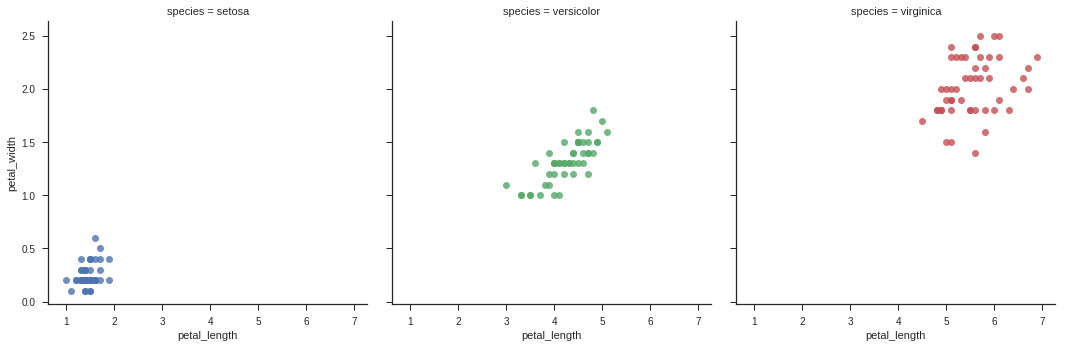

In [184]:
 g = sns.lmplot(x="petal_length", y="petal_width", hue="species", col="species",data=iris,fit_reg=False,size=5,aspect=1)

In [ ]:
# multi-classes

In [221]:
y_ps = cross_val_predict(sgd_clf, X_train, y_train, cv=3) 
y1=confusion_matrix(y_train, y_ps)
y1

array([[27, 13,  0],
       [ 1, 38,  2],
       [ 0, 34,  5]])

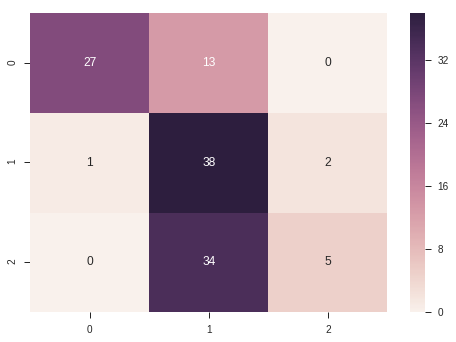

In [224]:
ax = sns.heatmap(y1, annot=True, fmt="d")

In [222]:
y_ps = cross_val_predict(forest_clf, X_train, y_train, cv=3) 
y2=confusion_matrix(y_train, y_ps)
y2

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  2, 37]])

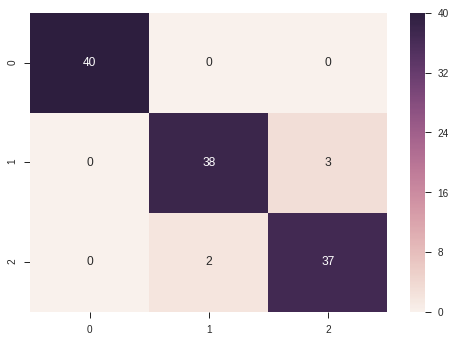

In [225]:
ax = sns.heatmap(y2, annot=True, fmt="d")

In [223]:
y_ps = cross_val_predict(GNB, X_train, y_train, cv=3) 
y3=confusion_matrix(y_train, y_ps)
y3

array([[40,  0,  0],
       [ 0, 37,  4],
       [ 0,  3, 36]])

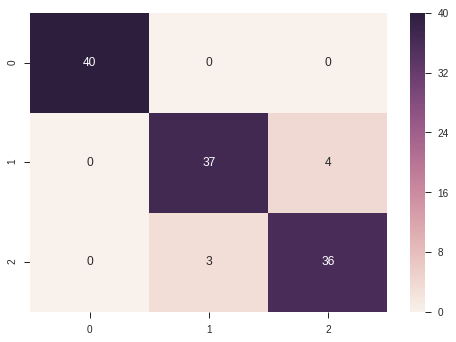

In [226]:
ax = sns.heatmap(y3, annot=True, fmt="d")